# Code by : Reham Essam ElDin ELTagoury
# Group : 5



## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X=np.linspace(0, 20)
Y=-2*X+1
type(X)


numpy.ndarray

In [3]:
X.shape

(50,)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def BatchGD(X,Y,alpha,epochs,eps):
  theta0=theta1=0.0
  m=len(X)
  allpredictions=[]
  thetas0=[]
  thetas1=[]
  losses=np.array([])
  for i in range(epochs):
      # for every epoch cal all the losses and predictions
      y_pred=theta0+theta1*X
      allpredictions.append(y_pred)
      thetas0.append(theta0)
      thetas1.append(theta1)
      losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
      grad0=np.sum((y_pred-Y))/m
      grad1=np.sum((y_pred-Y)@X)/m
      grad=[grad0,grad1]
      theta0=theta0-alpha*grad0
      theta1=theta1-alpha*grad1
      if np.linalg.norm(grad)<=eps:
        return thetas0,thetas1,losses,allpredictions,theta0,theta1
  return thetas0,thetas1,losses,allpredictions,theta0,theta1


#### Try your function with any input parameterss of your choice.

In [5]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=BatchGD(X,Y,0.01,3000,1e-3)
batch=allpredictions[-1]

#### Calculate r2 score

In [6]:
r2_score(Y,allpredictions[-1])

0.9999999719862712

#### Plot loss vs. epochs

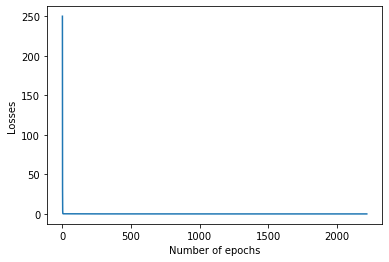

In [7]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("Number of epochs")
plt.ylabel("Losses")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

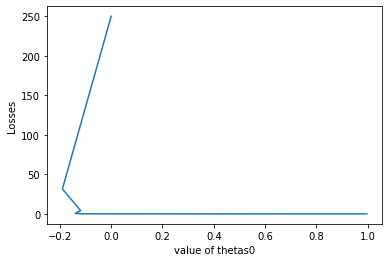

In [8]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.show()

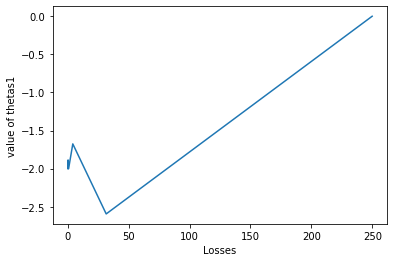

In [9]:
plt.plot(losses,thetas1)
plt.ylabel("value of thetas1")
plt.xlabel("Losses")
plt.show()

#### Plot all regression lines till converge

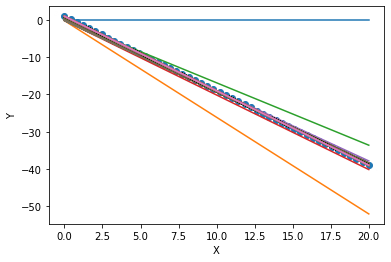

In [10]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Plot the best regression line

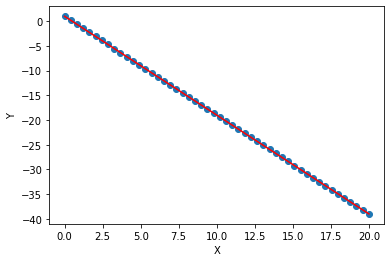

In [11]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [12]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=BatchGD(X,Y,0.001,10000,1e-3)

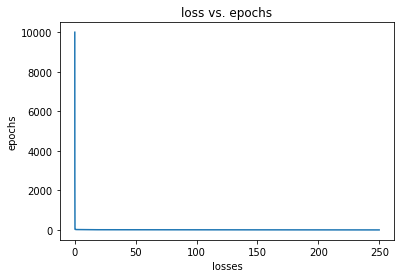

In [13]:
epochs=list(range(len(losses)))
plt.plot(losses,epochs)
plt.xlabel('losses')
plt.ylabel('epochs')
plt.title('loss vs. epochs');

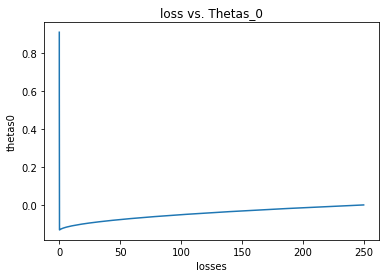

In [14]:
plt.plot(losses,thetas0)
plt.xlabel('losses')
plt.ylabel('thetas0')
plt.title('loss vs. Thetas_0');

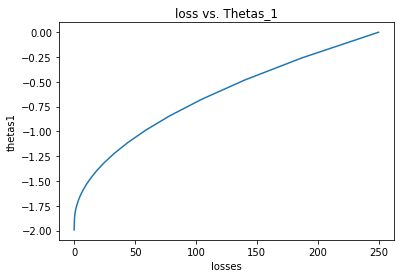

In [15]:
plt.plot(losses,thetas1)
plt.xlabel('losses')
plt.ylabel('thetas1')
plt.title('loss vs. Thetas_1');


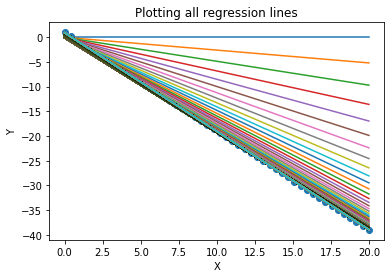

In [16]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plotting all regression lines');
plt.show()

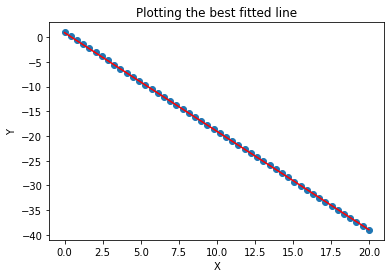

In [17]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plotting the best fitted line");
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [18]:
 def MiniBatch(X,Y,alpha,numberofminibatches,minibatchsize,eps,epochs):
   theta0=theta1=0.0
   thetas0=[]
   thetas1=[]
   losses=[]
   allpredictions=[]
   for i in range(epochs):
     for j in range(numberofminibatches):
       data = X[j:j+minibatchsize]
       y_out=Y[j:j+minibatchsize] # take care
       H_x=theta0+theta1*data
       thetas0.append(theta0)
       thetas1.append(theta1)
       allpredictions.append(theta0+theta1*X)
       grad0=np.sum(H_x-y_out)/len(y_out)
       grad1=np.sum((H_x-y_out)@data)/len(y_out)
       theta0=theta0-alpha*grad0
       theta1=theta1-alpha*grad1
       losses.append(np.sum((H_x-y_out)**2)/(2*len(y_out)))
       if np.linalg.norm([grad0,grad1])<=eps:
          return thetas0,thetas1,losses,allpredictions,theta0,theta1
      
   return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [19]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=MiniBatch(X,Y,0.001,5,10,1e-3,10000)
miniB=allpredictions[-1]

In [20]:
r2_score(Y,allpredictions[-1])

0.9999983541464439

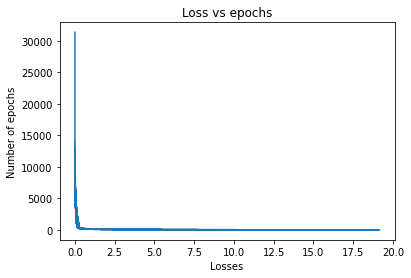

In [21]:
epochs=list(range(len(losses)))
plt.plot(losses,epochs)
plt.ylabel("Number of epochs")
plt.xlabel("Losses")
plt.title('Loss vs epochs');

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

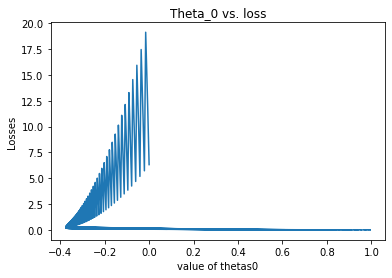

In [22]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title('Theta_0 vs. loss' );

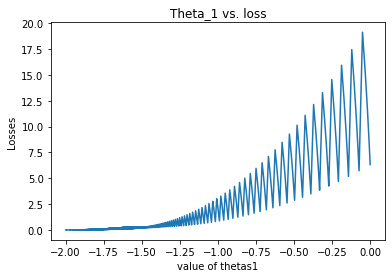

In [23]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title('Theta_1 vs. loss' );

## Ploting all predictions lines

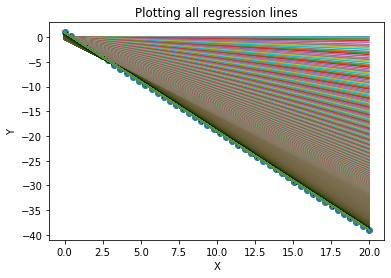

In [24]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plotting all regression lines');
plt.show()

## Ploting the Optimal fitted line

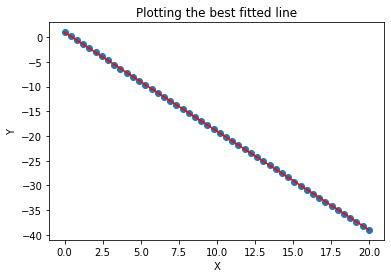

In [25]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plotting the best fitted line");
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [26]:
def StochasticGD(X,Y,alpha,epochs,eps):
  theta0=theta1=0.0
  m=len(X)
  losses=[]
  thetas0=[]
  thetas1=[]
  allpredictions=[]
  for i in range(epochs):
    for j in range(m):
      y=theta0+theta1*X[i]
      thetas0.append(theta0)
      thetas1.append(theta1)
      losses.append(((y-Y[i])**2)/(2*m))
      grad0=(y-Y[i])/m
      grad1=((y-Y[i])*X[i])/m
      grad=[grad0,grad1]
      allpredictions.append(theta0+theta1*X)
      if np.linalg.norm(grad)<=eps:
          return thetas0,thetas1,losses,allpredictions,theta0,theta1
      theta0=theta0-alpha*grad0
      theta1=theta1-alpha*grad1
  return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [27]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=StochasticGD(X,Y,0.01,100000,1e-3)
Stoch=allpredictions[-1]

In [28]:
r2_score(Y,allpredictions[-1])

0.9957447092273349

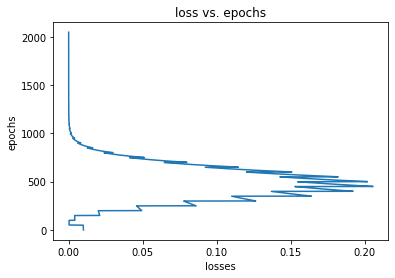

In [29]:
epochs=list(range(len(losses)))
plt.plot(losses,epochs)
plt.xlabel('losses')
plt.ylabel('epochs')
plt.title('loss vs. epochs');

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

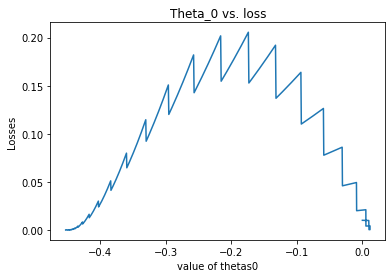

In [30]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title('Theta_0 vs. loss' );

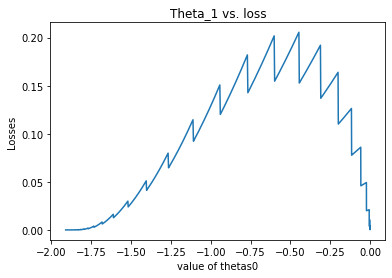

In [31]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title('Theta_1 vs. loss' );

## Ploting all predictions lines

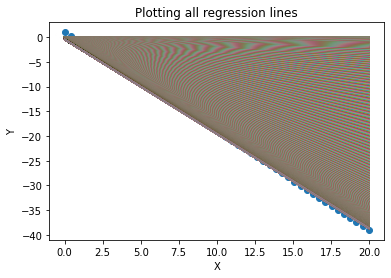

In [32]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plotting all regression lines');
plt.show()

## Ploting the Optimal fitted line

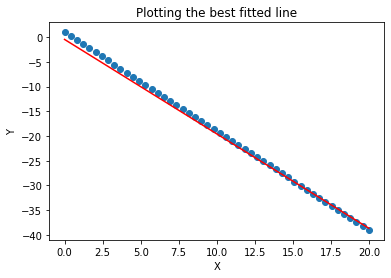

In [33]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plotting the best fitted line");
plt.show()

# Minibatch vs. Stochastic vs. Batch


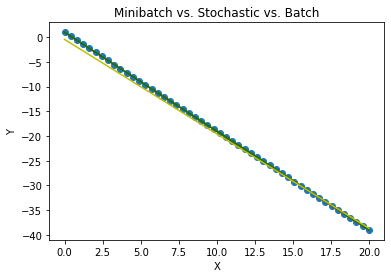

In [47]:
X=np.linspace(0, 20)
Y=-2*X+1
plt.scatter(X,Y)
plt.plot(X,batch,color='r')
plt.plot(X,miniB,color='g')
plt.plot(X,Stoch,color='y')
plt.xlabel('X')
plt.ylabel("Y")
plt.title('Minibatch vs. Stochastic vs. Batch');

### From the above graph we get that the Stochastic have the least accuracy